# Прогноз успеваемости студентов

# Признаки 

Всего три типа признаков binary - бинарный, numeric численный и minal - категориальный.

school - школа студента (binary: 'GP' - Gabriel Pereira или 'MS' - Mousinho da Silveira)   
sex - пол студента (binary: 'F' - female или 'M' - male)   
age - возраст студента (numeric: от 15 до 22)   
address - тип места проживания (binary: 'U' - город or 'R' - сельская местность)   
famsize - размер семьи (binary: 'LE3' - меньше или равно 3 or 'GT3' - больше 3)   
Pstatus - живут ли родители совместно (binary: 'T' - живут вместе или 'A' - поотдельности)   
Medu - образование матери (numeric: 0 - отсутствует, 1 - начальная школа (4th grade), 2 – с 5-ого по 9ый класс, 3 – оконченная средняя школа or 4 – высшее образование)    
Fedu - образование отца (numeric: 0 - отсутствует, 1 - начальная школа (4th grade), 2 – с 5-ого по 9ый класс, 3 – оконченная средняя школа or 4 – высшее образование)       
Mjob - работа матери (nominal: 'teacher'-учитель, 'health'-здравоохранения, 'services' - гражданская\государственная работа (например административная или в полиции), 'at_home' - дома или 'other')     
Fjob - работа отца (nominal: 'teacher'-учитель, 'health'-здравоохранения, 'services' - гражданская\государственная работа (например административная или в полиции), 'at_home' - дома или 'other')    
reason - причина выбора школы (nominal:'home'-близко к дому, 'reputation'-репутация школы, 'course'-предпочтения в курсах или 'other')        
guardian - представитель студента (nominal: 'mother', 'father' или 'other')   
traveltime - время от дома до школы (numeric: 1 - меньше 15 мин., 2 - от 15 до 30 мин., 3 - от 30 мин. до 1 часа, или 4 - больше 1 часа)   
studytime - еженедельные временные затраты на обучение (numeric: 1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 to 10 hours, или 4 - больше 10 часов)   
failures - количество проваленных классов в прошлом (numeric: n если n=1,2,3, иначе 4)   
schoolsup - дополнительная поддержа в обучении (видимо финансовая) (binary: yes or no)   
famsup - семейная образовательная поддержка (binary: yes or no)   
paid - оплата дополнительных уроков по предмету (Math) (binary: yes or no)    
activities - внеклассовые активности (binary: yes or no)    
nursery - учился ли в детском саду (binary: yes or no)    
higher - желание получить высшее образование (binary: yes or no)     
internet - домашний доступ к интернету (binary: yes or no)     
romantic - в любовных отношениях (binary: yes or no)     
famrel - качество семейных взаимоотношений (numeric: от 1 - очень плохие до 5 - отличные)     
freetime - кол-во свободного времени после школы (numeric: от 1 - очень мало до 5 - очень много)     
goout - как часто гуляет с друзьями (numeric: от 1 - очень мало до 5 - очень много)     
Dalc - кол-во потребляемого алкоголя в будни (numeric: от 1 - очень мало до 5 - очень много)     
Walc - кол-во потребляемого алкоголя в выходные (numeric: от 1 - очень мало до 5 - очень много)     
health - состояние здоровья (numeric: от 1 - очень плохое до 5 - отличное)      
absences - количество пропусков занятий (numeric: от 0 до 93)     

Семестровые оценки по математике (целевые признаки):

G1 - оценка за первый семестр (numeric: от 0 до 20)     
G2 - оценка за второй семестр (numeric: от 0 до 20)    
G3 - финальная оценка (numeric: от 0 до 20)    

Всего признаков: 33   
Количество учащихся: 395

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm

from sklearn.metrics import (make_scorer,
                            mean_squared_error,
                            mean_absolute_error, 
                            r2_score, 
                            accuracy_score)

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
import optuna

In [83]:
data = pd.read_csv('student-mat.csv')
pd.set_option('display.max_columns', None)
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [84]:
print('Данные: ')
print(data.head().T, '\n')

Данные: 
                  0        1        2         3       4
school           GP       GP       GP        GP      GP
sex               F        F        F         F       F
age              18       17       15        15      16
address           U        U        U         U       U
famsize         GT3      GT3      LE3       GT3     GT3
Pstatus           A        T        T         T       T
Medu              4        1        1         4       3
Fedu              4        1        1         2       3
Mjob        at_home  at_home  at_home    health   other
Fjob        teacher    other    other  services   other
reason       course   course    other      home    home
guardian     mother   father   mother    mother  father
traveltime        2        1        1         1       1
studytime         2        2        2         3       2
failures          0        0        3         0       0
schoolsup       yes       no      yes        no      no
famsup           no      yes       no  

In [85]:
data.duplicated().sum()

0

In [86]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [87]:
print('Информация о df: ')
print(data.info())

Информация о df: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    obje

### Дальнейшее преобразование

In [88]:
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [89]:
binary_features=['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
numeric_features=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']

for title in binary_features:
    encoder = LabelEncoder()
    data[title] = encoder.fit_transform(data[title])
    print(title)
    print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

data = data.drop(columns=['Mjob', 'Fjob', 'reason', 'guardian'], axis=1)
data['G_average']=(data['G1']+data['G2']+data['G3'])/3
data = data.drop(columns=['G3', 'G2', 'G1'], axis=1)

school
{'GP': 0, 'MS': 1}
sex
{'F': 0, 'M': 1}
address
{'R': 0, 'U': 1}
famsize
{'GT3': 0, 'LE3': 1}
Pstatus
{'A': 0, 'T': 1}
schoolsup
{'no': 0, 'yes': 1}
famsup
{'no': 0, 'yes': 1}
paid
{'no': 0, 'yes': 1}
activities
{'no': 0, 'yes': 1}
nursery
{'no': 0, 'yes': 1}
higher
{'no': 0, 'yes': 1}
internet
{'no': 0, 'yes': 1}
romantic
{'no': 0, 'yes': 1}


In [90]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
school,395.0,0.116456,0.321177,0.000000,0.000000,0.000000,0.000000,1.000000
sex,395.0,0.473418,0.499926,0.000000,0.000000,0.000000,1.000000,1.000000
age,395.0,16.696203,1.276043,15.000000,16.000000,17.000000,18.000000,22.000000
address,395.0,0.777215,0.416643,0.000000,1.000000,1.000000,1.000000,1.000000
famsize,395.0,0.288608,0.453690,0.000000,0.000000,0.000000,1.000000,1.000000
Pstatus,395.0,0.896203,0.305384,0.000000,1.000000,1.000000,1.000000,1.000000
Medu,395.0,2.749367,1.094735,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,395.0,2.521519,1.088201,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,395.0,1.448101,0.697505,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,395.0,2.035443,0.839240,1.000000,1.000000,2.000000,2.000000,4.000000


### Построим матрицу корреляций ###

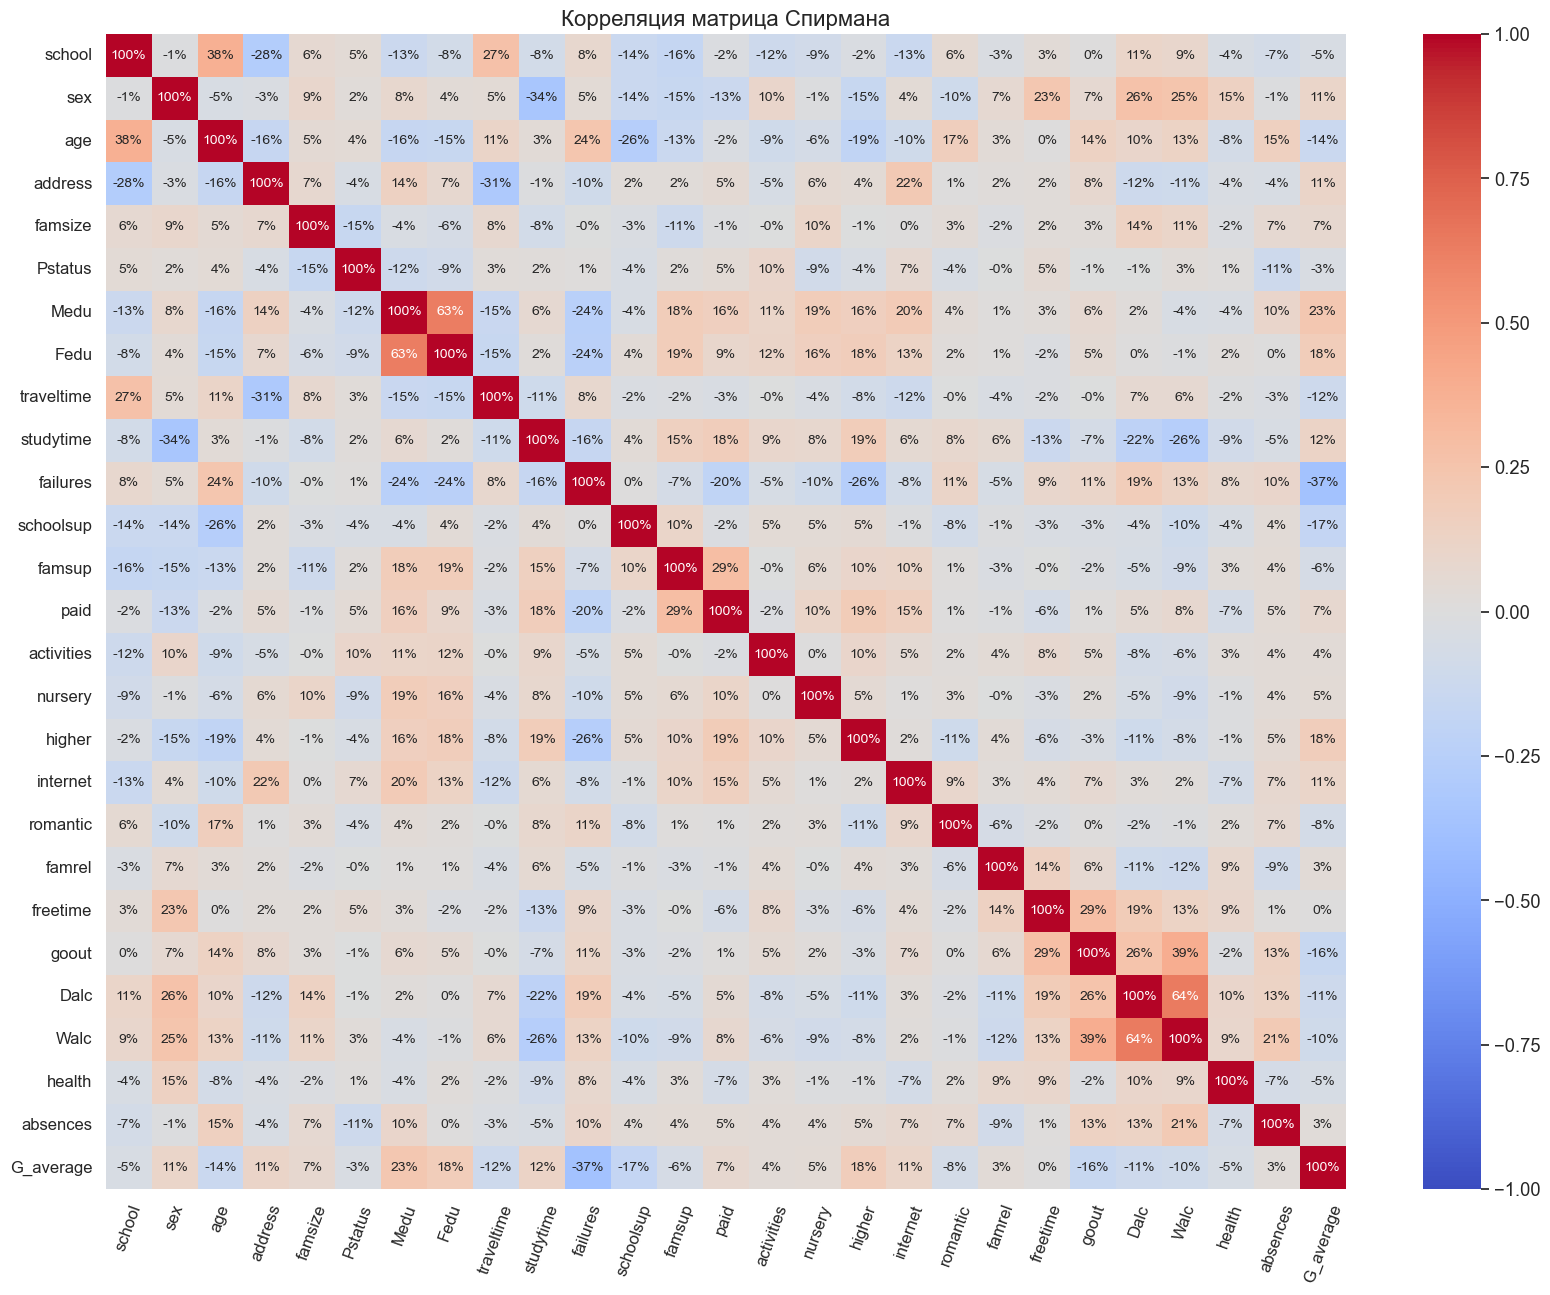

In [91]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(method='spearman'),annot=True, 
                     fmt='.0%', 
                     cmap="coolwarm",
                     vmin=-1, vmax=1,
                     center=0,
                     annot_kws={"size": 10})

plt.tick_params(axis='x', labelrotation=70, labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.title('Корреляция матрица Спирмана', fontsize=16);

Оценка за экзамен больше всего коррелирует с оценкой за другие экзамены, поэтому я удалил заранее. Видно также сильную корреляцию между признаками созданными из одной категориальной переменной.

# Анализ

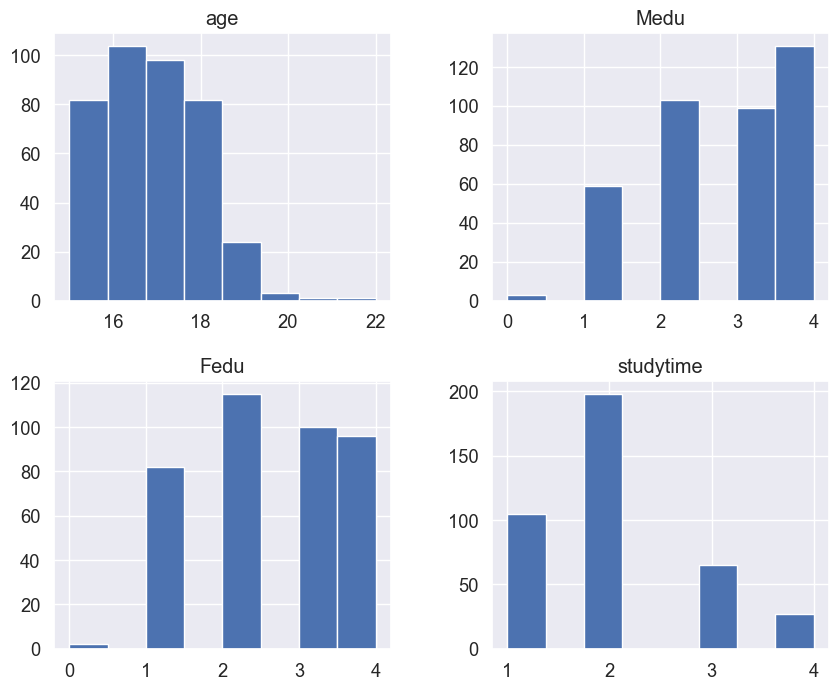

In [92]:
features_to_hist=['age','Medu','Fedu','studytime']
#Строим графики
sns.set(font_scale=1.2)
data[features_to_hist].hist(figsize=(10,8),bins=8);

In [93]:
# Много родителей не закончили среднюю школу
# Большинство учеников тратят на учебу от 2 до 5 часов в неделю
# А средний возраст равен:
print('средний возраст:',data['age'].mean())
data['age'].value_counts()

средний возраст: 16.696202531645568


age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

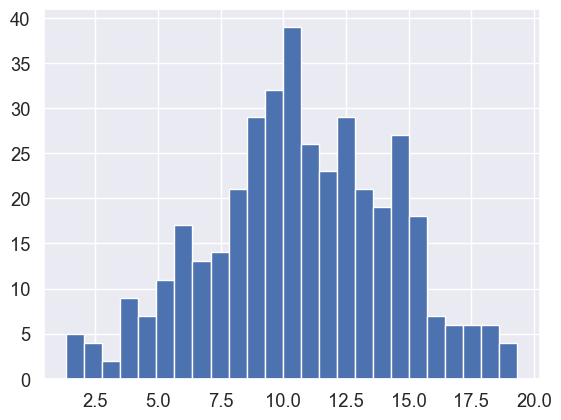

In [94]:
data['G_average'].hist(bins=25);

In [95]:
stats, p_value = scipy.stats.normaltest(data['G_average'])

alpha = 0.05

if p_value > alpha:
    print(f'Нулевую гипотезу не отклоняем, данные нормально распределены {round(p_value, 2)}')
else:
    print(f'Нулевую гипотезу отклоняем, данные не нормально распределены {round(p_value, 2)}')

Нулевую гипотезу не отклоняем, данные нормально распределены 0.16


### Разбиение выборки

In [96]:
X=data.drop(columns=['G_average'], axis=1)
y=data['G_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [97]:
model_osl = sm.OLS(y, X).fit()
print(model_osl.summary())

                                 OLS Regression Results                                
Dep. Variable:              G_average   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              160.0
Date:                Wed, 02 Jul 2025   Prob (F-statistic):                   2.09e-183
Time:                        09:30:49   Log-Likelihood:                         -1023.0
No. Observations:                 395   AIC:                                      2098.
Df Residuals:                     369   BIC:                                      2201.
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Выбор модели #

In [ ]:
# Для визуализации результатов
def plot_model_results(y_true, y_pred):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    residuals = y_true - y_pred
    plt.hist(residuals, bins=30)
    plt.xlabel('Ошибки')
    plt.ylabel('Частота')
    plt.title('Распределение ошибок')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Ошибки')
    plt.title('Ошибки vs Предсказания')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [99]:
# Для оценки модели
def evaluate_model(y_true, y_pred):
    print("\nОценка модели на тестовых данных:")
    print("-" * 40)
    print(f"R2: {r2_score(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    
    residuals = y_true - y_pred
    print("\nСтатистика ошибок:")
    print("-" * 40)
    print(residuals.describe())

In [100]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 31),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 30),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': True,
        'random_state': 42
    }
    
    model = RandomForestRegressor(**params)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scorer = make_scorer(mean_squared_error)
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scorer)
    
    return np.mean(scores)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("\nЛучшие параметры:", study.best_params)
print("Лучший MSE:", study.best_value)

[I 2025-07-02 09:30:49,127] A new study created in memory with name: no-name-8788a61d-ffb9-4ee2-9301-a95173da465d


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-07-02 09:30:50,027] Trial 0 finished with value: 11.599190309983431 and parameters: {'n_estimators': 143, 'max_depth': 19, 'min_samples_leaf': 14, 'min_samples_split': 13, 'max_features': 'log2'}. Best is trial 0 with value: 11.599190309983431.
[I 2025-07-02 09:30:51,600] Trial 1 finished with value: 11.850824717278801 and parameters: {'n_estimators': 255, 'max_depth': 4, 'min_samples_leaf': 18, 'min_samples_split': 10, 'max_features': 'log2'}. Best is trial 0 with value: 11.599190309983431.
[I 2025-07-02 09:30:54,491] Trial 2 finished with value: 11.398713700330708 and parameters: {'n_estimators': 471, 'max_depth': 14, 'min_samples_leaf': 11, 'min_samples_split': 10, 'max_features': 'log2'}. Best is trial 2 with value: 11.398713700330708.
[I 2025-07-02 09:30:56,390] Trial 3 finished with value: 11.050511845684806 and parameters: {'n_estimators': 277, 'max_depth': 3, 'min_samples_leaf': 16, 'min_samples_split': 5, 'max_features': None}. Best is trial 3 with value: 11.0505118456

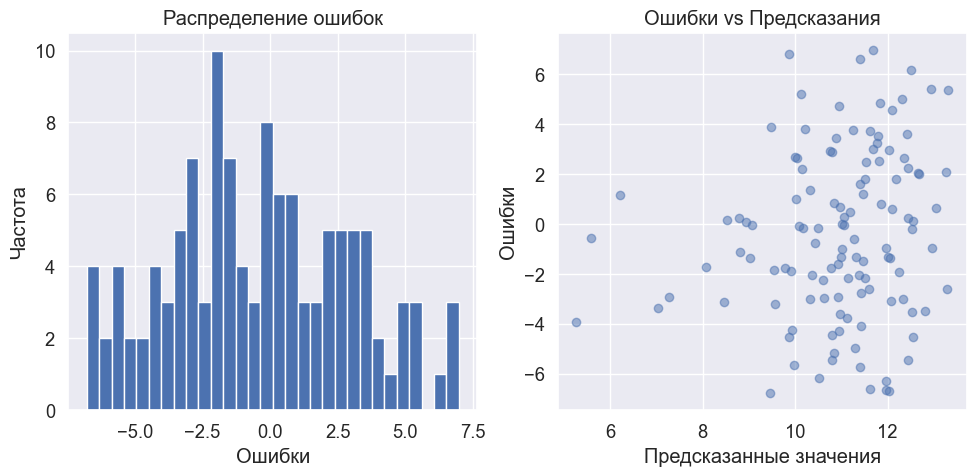


Оценка модели на тестовых данных:
----------------------------------------
R2: 0.2463
MSE: 11.3227
RMSE: 3.3649
MAE: 2.7776

Статистика ошибок:
----------------------------------------
count    119.000000
mean      -0.414233
std        3.353453
min       -6.779770
25%       -2.945090
50%       -0.576551
75%        2.136329
max        6.975131
Name: G_average, dtype: float64


In [101]:
rfc_base = RandomForestRegressor(**study.best_params)
rfc_base.fit(X_train, y_train)

y_predict = rfc_base.predict(X_test)
plot_model_results(y_true=y_test, y_pred=y_predict)
evaluate_model(y_true=y_test, y_pred=y_predict)

In [102]:
box = ['sex', 'age', 'Pstatus', 'Fedu', 'studytime', 'failures', 'schoolsup', 'famsup', 'higher', 'internet', 'romantic', 'freetime', 'goout']

X_train, X_test= X_train[box], X_test[box]

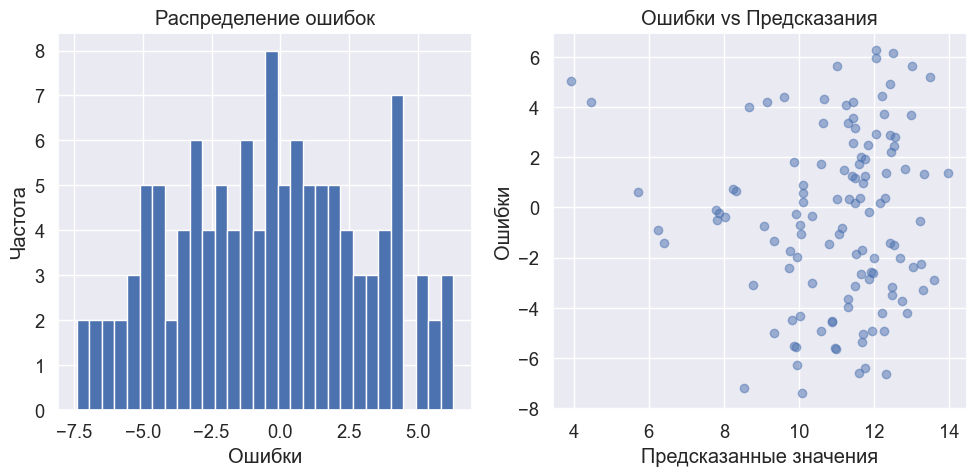


Оценка модели на тестовых данных:
----------------------------------------
R2: 0.2071
MSE: 11.9116
RMSE: 3.4513
MAE: 2.8678

Статистика ошибок:
----------------------------------------
count    119.000000
mean      -0.439226
std        3.437729
min       -7.402131
25%       -3.058372
50%       -0.340426
75%        1.964460
max        6.288974
Name: G_average, dtype: float64


In [103]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

y_predict = lin_model.predict(X_test)
plot_model_results(y_true=y_test, y_pred=y_predict)
evaluate_model(y_true=y_test, y_pred=y_predict)

## Выводы ##

В процессе обучения, нам удалось выделить значимые признаки влияющие на успеваемость. Для улучшения модели можно использовать более сложные модели, но пока были расмотрены Лин модель и Случ Леса. Также удалось воспользоваться современным способом подбором гиперпараметров. Если уменьшитьь значений, то в целом, нам может подойти линейная модель. Для улучшения модели, можно обьеденить параметры и создать новые.